# Key Points about K-Nearest Neighbors (KNN)

## 1. What is KNN?
- KNN is a simple and intuitive supervised machine learning algorithm used for **classification** and **regression** tasks.
- It classifies a data point based on the majority class of its **K-nearest neighbors**.

## 2. How KNN Works:
- KNN calculates the **distance** between the query point and all points in the dataset.
- Common distance metrics include:
  - **Euclidean Distance**
  - **Manhattan Distance**
  - **Minkowski Distance**
- It selects the **K closest data points** and assigns the label based on the majority class for classification or averages their values for regression tasks.

## 3. Advantages of KNN:
- Easy to understand and implement.
- Works well with small datasets and non-linear decision boundaries.
- No explicit training phase (it’s a **lazy learning algorithm**).

## 4. Limitations of KNN:
- Computationally expensive during predictions, as the distance to every data point must be calculated.
- Sensitive to the choice of **K** (number of neighbors) and **distance metric**.
- Does not perform well with high-dimensional data due to the **curse of dimensionality**.
- Sensitive to imbalanced datasets (the majority class might dominate).

## 5. Choosing the Optimal K:
- A small value of K can make the algorithm sensitive to noise.
- A large value of K can smooth the decision boundary but may lead to underfitting.
- Use techniques like **cross-validation** to find the best value of K.

## 6. Evaluation Metrics for KNN:
- **For classification**:
  - **Accuracy**
  - **Confusion Matrix**
  - **Precision, Recall, and F1-Score**
  - **ROC-AUC Score**
- **For regression**:
  - **Mean Squared Error (MSE)**
  - **Mean Absolute Error (MAE)**
  - **R² Score**

## 7. Applications of KNN:
- Recommender systems (e.g., finding similar users/items).
- Image and video recognition.
- Medical diagnosis (e.g., predicting diseases).
- Stock market prediction.

## 8. When to Use KNN:
- When you have a **small dataset** with relatively low dimensionality.
- When simplicity and interpretability are key.
- When you need a quick baseline model.

## 9. Best Practices with KNN:
- Always **scale/normalize the data** to ensure that features contribute equally to distance calculations.
- Use **cross-validation** to choose the optimal value of K.
- Consider dimensionality reduction techniques (e.g., PCA) for high-dimensional data.

---

## Conclusion
K-Nearest Neighbors is a simple yet powerful algorithm that works well in various classification and regression tasks. However, it requires careful consideration of parameters like the number of neighbors (K), distance metrics, and scaling techniques to achieve optimal results. Despite its limitations, KNN remains a go-to algorithm for quick and interpretable solutions.

In [19]:
# Example of KNN classfier on IRIS data using SNS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier , KNeighborsRegressor

iris = sns.load_dataset('iris')
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# split data into X and y
X = iris.drop('species', axis=1)
y = iris['species']


In [11]:
# load and fit  the classifier on the  data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
# predict the class of new data 
knn.predict(X_test)


array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa'], dtype=object)

In [14]:
# evaluate the model using classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, knn.predict(X_test)))
print(confusion_matrix(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


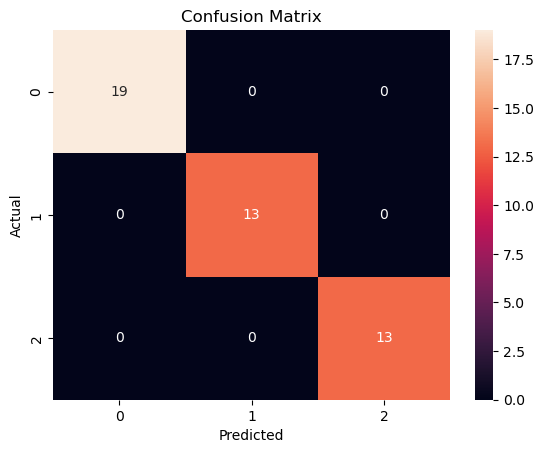

In [15]:
# plot confusion matrix
cm = confusion_matrix(y_test, knn.predict(X_test))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# calculate accuracy
knn.score(X_test, y_test)

1.0

# Regression using KNN

In [21]:
# Reggression using KNN

# load tips data 
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [31]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    int64  
 3   smoker      244 non-null    int64  
 4   day         244 non-null    int64  
 5   time        244 non-null    int64  
 6   size        244 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 13.5 KB


In [28]:
# encode the categorical cols using for loops and le
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in tips.columns:
    if tips[col].dtype == 'object' or tips[col].dtype == 'category':
        tips[col] = le.fit_transform(tips[col])

In [29]:
# split data into X and y
X = tips.drop('tip', axis=1)
y = tips['tip']

In [52]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# load and fit the classifier on the data
knn = KNeighborsRegressor(n_neighbors=5 , metric='minkowski' , p=2)

# fit the model
knn.fit(X_train, y_train)

# prdict the class of new data 
y_pred = knn.predict(X_test)

# evaluate the model using mean squared error 
from sklearn.metrics import mean_squared_error , r2_score
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')



Mean Squared Error: 0.9666780540540539
Root Mean Squared Error: 0.9831978712619621
R2 Score: 0.2666621286367459


In [53]:
X_test.head()

,total_bill,sex,smoker,day,time,size
24,19.82,1,0,1,0,2
6,8.77,1,0,2,0,2
153,24.55,1,0,2,0,4
211,25.89,1,1,1,0,4
198,13.00,0,1,3,1,2


In [56]:
# predict a specific value 
knn.predict([[450.82, 1, 1, 1, 0,  3]])

/home/dark/miniconda3/envs/python_ml/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([6.346])